In [1]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chandrimad31/eurusd-forex-trading-data-20032021")

print("Path to dataset files:", path)

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.0-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.0-py3-none-any.whl (78 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl (102 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 546k/546k [00:01<00:00, 404kB/s]

Extracting files...
Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\chandrimad31\eurusd-forex-trading-data-20032021\versions\1


In [3]:
!pip install pandas
import pandas as pd
df = pd.read_csv("EURUSD_ForexTrading_4hrs_05.05.2003_to_16.10.2021.csv")

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df.head()

,Gmt time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083


In [5]:
# Check if NA or missing values are there. 
df.count()

Gmt time    28860
open        28860
high        28860
low         28860
close       28860
volume      28860
dtype: int64

In [6]:
df.isna().sum()

Gmt time    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [7]:
df.isna().count()

Gmt time    28860
open        28860
high        28860
low         28860
close       28860
volume      28860
dtype: int64

In [ ]:
def support(df1, l, n1, n2):
    for i in range(l-n1+1,l+1):
        if(df1.low[i]>df1.low[i-1]):
           return 0
        # This loop checks the low prices of the last n1 candles leading up to candle l. If any of these candles have a low price that is greater than the low price of the previous candle, it indicates that there is no support at candle l, and the function returns 0.

    for i in range(l+1, l+n2+1):
        if(df1.low[i]<df1.low[i-1]):
            return 0
        #  This loop checks the low prices of the next n2 candles following candle l. If any of these candles have a low price that is less than the low price of the previous candle, it indicates that there is no support at candle l, and the function returns 0.

    return 1

def resistance(df1, l, n1, n2):
    for i in range(l-n1+1,l+1):
        if(df1.high[i]<df1.high[i-1]):
        #  This loop checks the high prices of the last n1 candles leading up to candle l. If any high price is lower than that of the previous candle, it indicates that there is no resistance at candle l, and the function returns 0.

            return 0
    for i in range(l+1,l+n2+1):
        if(df1.high[i]>df1.high[i-1]):
        # This loop checks the high prices of the next n2 candles following candle l. If any high price exceeds that of the previous candle, it indicates that there is no resistance at candle l, and the function returns 0.

            return 0
    return 1

## Understanding the Lists in Your Code

### These lines in your code initialize lists to store calculated values related to candlestick patterns:

    1. bodydiff = [0] * length:
        Creates a list named bodydiff.
        Its length is equal to the number of data points in your DataFrame (length).
        Initialized with all values set to 0.
        Stores the difference between the open and close prices of each candlestick, representing the body size.

    2. highdiff = [0] * length:
        Creates a list named highdiff.
        Stores the difference between the high price and the higher of the open or close price for each candlestick.
        Initialized with 0s.
        Represents the upper shadow (or wick) of the candlestick.

    3. lowdiff = [0] * length:
        Creates a list named lowdiff.
        Stores the difference between the lower of the open or close price and the low price for each candlestick.
        Initialized with 0s.
        Represents the lower shadow of the candlestick.

    4. ratio1 = [0] * length:
        Stores the ratio of highdiff to bodydiff for each candlestick.
        Used in identifying specific candlestick patterns, like shooting stars or hammers.

    5. ratio2 = [0] * length:
        Stores the ratio of lowdiff to bodydiff for each candlestick.
        Also used in pattern recognition.

In summary: These lists act as containers to store intermediate calculations that are crucial for your candlestick pattern recognition logic. Your functions like isEngulfing and isStar utilize these values to determine if a specific pattern has occurred at a given point in your data.

In [12]:
length = len(df)
high = list(df['high'])
low = list(df["low"])
close = list(df["close"])

open = list(df["open"])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length


  

In [9]:
def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001      

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and 
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and 
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
       
def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0
    
def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.high[l]-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c2 = abs(max(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c3 = min(df.open[l],df.close[l])<min(levels, key=lambda x:abs(x-df.high[l]))
    c4 = df.low[l]<min(levels, key=lambda x:abs(x-df.high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0
    
def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.low[l]-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c2 = abs(min(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c3 = max(df.open[l],df.close[l])>min(levels, key=lambda x:abs(x-df.low[l]))
    c4 = df.high[l]>min(levels, key=lambda x:abs(x-df.low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

WHat we need is part of a trading strategy now that analyzes price data to generate trading signals based on specific conditions related to support and resistance levels, as well as candlestick patterns. Let's break down the code step by step to understand its functionality and purpose.
Overview
The goal is to create a signal array that indicates potential buy or sell opportunities based on:

    Support and resistance levels.
    Specific candlestick patterns (engulfing and star patterns).
    Conditions related to price proximity to these levels.

Key Components

    Parameters:
        n1 = 2: The number of candles to look back when checking for support or resistance.
        n2 = 2: The number of candles to look forward when checking for support or resistance.
        backCandles = 30: The number of past candles to consider when evaluating potential support and resistance levels.
        signal = * length: Initializes a list (or array) called signal with zeros, where each index will later hold a trading signal.


In [23]:
n1=2
n2=2
backCandles=30
signal = [0] * length

# This loop iterates over each candle in the DataFrame df, starting from backCandles up to the length of the DataFrame minus n2. This ensures that there are enough candles before and after the current candle for analysis.
"""Initialization: Two empty lists, ss (for support levels) and rr (for resistance levels), are created for each iteration.
Inner Loop: This loop goes through the last backCandles (plus n1) candles leading up to the current candle (row).

    It checks if each subrow is a support level using the support() function. If it is, the low price of that candle is appended to the ss list.
    Similarly, it checks if each subrow is a resistance level using the resistance() function. If it is, the high price of that candle is appended to the rr list.
"""
for row in range(backCandles, len(df)-n2):
    
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.high[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0


AttributeError: 'DataFrame' object has no attribute 'low'

In [14]:
df['signal']=signal

In [15]:
df[df['signal']==1].count()

Gmt time    258
open        258
high        258
low         258
close       258
volume      258
signal      258
dtype: int64

In [16]:
df.columns = ['Local time', 'Open', 'High', 'Low', 'Close', 'Volume', 'signal']
#df=df.iloc[100:200]
df

,Local time,Open,High,Low,Close,Volume,signal
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976,0
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,0
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,0
...,...,...,...,...,...,...,...
28855,15.10.2021 01:00:00.000,1.15940,1.16120,1.15938,1.16082,5738.6300,0
28856,15.10.2021 05:00:00.000,1.16082,1.16189,1.15995,1.16034,13149.6600,0
28857,15.10.2021 09:00:00.000,1.16033,1.16124,1.15892,1.15923,14914.3300,0
28858,15.10.2021 13:00:00.000,1.15923,1.16103,1.15893,1.15953,20002.5300,0


In [17]:
def SIGNAL():
    return df.signal

In [18]:
!pip install backtesting

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#A new strategy needs to extend Strategy class and override its two abstract methods: init() and next().
#Method init() is invoked before the strategy is run. Within it, one ideally precomputes in efficient, 
#vectorized manner whatever indicators and signals the strategy depends on.
#Method next() is then iteratively called by the Backtest instance, once for each data point (data frame row), 
#simulating the incremental availability of each new full candlestick bar.

#Note, backtesting.py cannot make decisions / trades within candlesticks — any new orders are executed on the
#next candle's open (or the current candle's close if trade_on_close=True). 
#If you find yourself wishing to trade within candlesticks (e.g. daytrading), you instead need to begin 
#with more fine-grained (e.g. hourly) data.

In [19]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):  
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next() 
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 600e-4
            tp1 = self.data.Close[-1] + 450e-4
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 600e-4
            tp1 = self.data.Close[-1] - 450e-4
            self.sell(sl=sl1, tp=tp1)

In [20]:
from backtesting import Backtest

bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)
stat = bt.run()
stat



C:\Users\Asus\AppData\Local\Temp\ipykernel_27188\1132592598.py:3: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)


Start                                     0.0
End                                   28859.0
Duration                              28859.0
Exposure Time [%]                    89.62578
Equity Final [$]                  14024.11271
Equity Peak [$]                   14024.11271
Return [%]                          40.241127
Buy & Hold Return [%]                3.354294
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -23.948843
Avg. Drawdown [%]                    -1.30234
Max. Drawdown Duration                17012.0
Avg. Drawdown Duration             301.851064
# Trades                                198.0
Win Rate [%]                        72.222222
Best Trade [%]                       4.236873
Worst Trade [%]                     -5.627949
Avg. Trade [%]                    

In [22]:
bt.plot()

GridPlot(id='p1709', ...)

In [28]:
#Target flexible way
pipdiff = 250*1e-4 #for TP
SLTPRatio = 1 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.9 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


<Axes: >

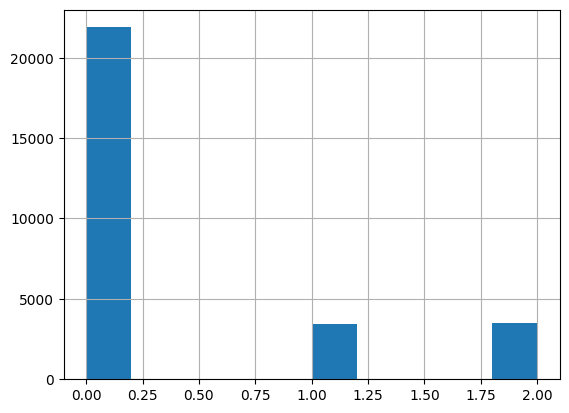

In [ ]:
!pip install matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
#!!! pitfall one category high frequency
df['Target'] = mytarget(30, df)
#df.tail(20'Target'] = df['Target'].astype(int)
df['Target'].hist()

In [ ]:
!pip install pandas_ta
import pandas_ta as pa
df["RSI"] = pa.rsi(df.Close, length=16)
df.tail(20)

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218925 sha256=d9b58490a624f13cd212ae6d1920b9676fd6601133e9957f2b8fa0a584b4ee8d
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d
Successfully built pandas_ta


,Local time,Open,High,Low,Close,Volume,signal,Target,RSI
28840,12.10.2021 13:00:00.000,1.15419,1.15504,1.15254,1.15283,18731.27,0,NaN,34.119341
28841,12.10.2021 17:00:00.000,1.15283,1.15351,1.15244,1.15307,6749.27,0,NaN,35.388781
28842,12.10.2021 21:00:00.000,1.15309,1.15428,1.15292,1.15414,3025.61,0,NaN,40.812369
28843,13.10.2021 01:00:00.000,1.15415,1.15559,1.15409,1.15527,4160.40,0,NaN,45.925583
28844,13.10.2021 05:00:00.000,1.15528,1.15604,1.15457,1.15565,11030.24,0,NaN,47.550889
28845,13.10.2021 09:00:00.000,1.15564,1.15669,1.15363,1.15430,18650.34,0,NaN,42.688668
28846,13.10.2021 13:00:00.000,1.15430,1.15788,1.15405,1.15780,23598.19,0,NaN,55.322337
28847,13.10.2021 17:00:00.000,1.15781,1.15975,1.15780,1.15956,11188.68,0,NaN,60.046425
28848,13.10.2021 21:00:00.000,1.15961,1.16013,1.15925,1.15992,4511.04,0,NaN,60.947366
28849,14.10.2021 01:00:00.000,1.15992,1.16009,1.15890,1.15900,9698.85,0,NaN,57.417952


In [35]:
df.head(20)

,Local time,Open,High,Low,Close,Volume,signal,Target,RSI
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12166,1.12274,95533.0976,0,2.0,NaN
1,05.05.2003 01:00:00.000,1.12242,1.12276,1.12067,1.12126,93778.5996,0,2.0,NaN
2,05.05.2003 05:00:00.000,1.12139,1.12255,1.12030,1.12113,90924.6992,0,2.0,NaN
3,05.05.2003 09:00:00.000,1.12092,1.12331,1.12049,1.12174,91254.6992,0,2.0,NaN
4,05.05.2003 13:00:00.000,1.12194,1.12900,1.12130,1.12712,308003.4083,0,2.0,NaN
5,05.05.2003 17:00:00.000,1.12718,1.13019,1.12657,1.12804,373668.2930,0,2.0,NaN
6,05.05.2003 21:00:00.000,1.12798,1.13004,1.12772,1.12913,94283.7988,0,2.0,NaN
7,06.05.2003 01:00:00.000,1.12892,1.12967,1.12743,1.12855,95461.9980,0,2.0,NaN
8,06.05.2003 05:00:00.000,1.12856,1.13412,1.12738,1.13381,92809.0996,0,2.0,NaN
9,06.05.2003 09:00:00.000,1.13383,1.13662,1.13188,1.13456,90255.7988,0,2.0,NaN
